# This notebook uses the VGG 16 pretrained weights and predict an image

### The Various classes of the Imagenet are mentioned here
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [3]:
# define the VggNet architecture and return the model
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np

# define a VGG16 network
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    model.add(Flatten())
    #top layer of the VGG net
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    if weights_path:
        model.load_weights(weights_path)
    return model

### Take a test image and pass it on to the VGG16 model to predict

In [4]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

base_location = '/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/'
img_name = base_location+'cat_standing.jpg'
#img_names = [base_location+'cat_standing.jpg', base_location+'dog.jpg', base_location+'horse_1.jpg']
#imgs = [scipy.misc.imresize(scipy.misc.imread(img_name), (224,224)).astype('float32') for img_name in img_names]
#imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32,32)), (1,0,2)).astype('float32') for img_name in img_names]
#imgs = np.array(imgs) / 255
img = scipy.misc.imresize(scipy.misc.imread(img_name), (224,224)).astype('float32')
print(img.shape)
img = img.transpose((2,0,1))
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)

#train
optim=SGD()
model1 = VGG_16('/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/vgg16_weights.h5')
model1.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#predict
predictions = model1.predict(img)
print(np.argmax(predictions))

(224, 224, 3)
(3, 224, 224)
(1, 3, 224, 224)


ValueError: The shape of the input to "Flatten" is not fully defined (got (0, 7, 512). Make sure to pass a complete "input_shape" or "batch_input_shape" argument to the first layer in your model.

## Use Pretrained models which are available in Keras

In [5]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
%matplotlib inline

# Use the pretrained Vgg16 model
model = VGG16(weights='imagenet', include_top=True)
model.summary()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

(224, 224, 3)
(1, 224, 224, 3)


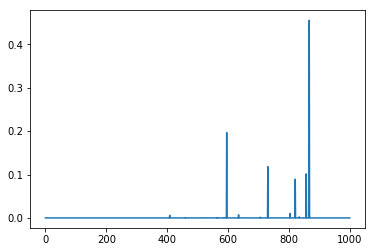

866


In [2]:
#resize into Vgg16 trained image format

base_location = '/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/'
img_name = base_location+'steam_engine.jpg'
img = scipy.misc.imresize(scipy.misc.imread(img_name), (224,224)).astype('float32')
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)

# predict
out = model.predict(img)
plt.plot(out.ravel())
plt.show()
print(np.argmax(out))

### Get the weights of a particular layer

In [10]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

# pre-built and pre-trained deep learning VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
for i, layer in enumerate(base_model.layers):
     print (i, layer.name, layer.output_shape)

# extract features from block4_pool block
model = Model(input=base_model.input, output=base_model.get_layer('block4_pool').output)
print('*********************************')
model.summary()

#resizing image
img_path = base_location+'cat_standing.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# get the features from this block
features = model.predict(x)
print(features)

0 input_6 (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)
*********************************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
______

/Users/tkmacl9/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=flatten_1/..., outputs=InplaceDim...)`


block4_conv3 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 14, 14, 512)       0         
Total params: 7,635,264
Trainable params: 7,635,264
Non-trainable params: 0
_________________________________________________________________
[[[[   0.            0.            0.         ...,    0.            0.
       0.        ]
   [   0.            0.            0.         ...,    0.            0.
       0.        ]
   [   0.            0.            0.         ...,    0.           10.13583851
       0.        ]
   ..., 
   [   0.            0.            0.         ...,    0.            0.
       0.        ]
   [   0.            0.            0.         ...,    8.46161747    0.
       0.        ]
   [   0.            0.           11.76675415 ...,   17.23648643    0.
       0.        ]]

  [[   0.            0.            6.26944399 ...,   39.08948898
      13.22397137    0.        ]
   